## 跑通最小 demo

In [5]:
import kineticstoolkit.lab as ktk

filename = ktk.doc.download("kinematics_tennis_serve.c3d")
c3d_contents = ktk.read_c3d(filename)
markers = c3d_contents["Points"]


# Non-interactive, inline backend
%matplotlib inline

# Create the player and set a viewpoint
player = ktk.Player(
    markers,
    up="z",
    zoom=1.5,
    azimuth=0.8,
    elevation=0.16,
    translation=(-0.2, -1.0),
)

# Create an html video to be included in the Jupyter Notebook
player.to_html5(
    start_time=6,
    stop_time=8
)

UserWarning [/Users/wangshuaibo/anaconda3/envs/kineticstoolkit/lib/python3.11/site-packages/kineticstoolkit/player.py:361] frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.


: 

## 练习点、向量以及坐标的转换
参考链接：https://kineticstoolkit.uqam.ca/doc/geometry_transform_moving_coordinates.html

In [43]:
import numpy as np
# 练习点、向量以及坐标系的转换
angle_rad = np.deg2rad(30)
R = np.array([
    [np.cos(angle_rad), -np.sin(angle_rad),0],
    [np.sin(angle_rad), np.cos(angle_rad),0],
    [0,0,1],
    [0,0,0]
])
P = np.array([[2],
     [0],
     [0],
     [0]])
# 计算变化矩阵
T = np.concatenate((R,P),axis=1) # 按照列进行拼接
print("变化矩阵为：\n", T)

# 计算点的变化
# 点的变化即有旋转又有平移
p_initial = np.array([[10],
                      [0],
                      [0],
                      [1]])
p_transformed = np.dot(T, p_initial)
print("点变换后的坐标：\n",np.round(p_transformed,2))

# 计算向量的变化
# 向量的变化只有旋转，没有位置
# 向量最后一位是 0 和坐标相乘就会变为 0 
# 向量和点的坐标位置是一样的，但就是最后一位数
vector_initial = np.array([[10],
                           [0],
                           [0],
                           [0]])
vector_transformed = np.dot(T,vector_initial)
print("向量变化后的坐标：\n", np.round(vector_transformed,2))

frame_initial = np.array([
    [1,0,0,10],
    [0,1,0,0],
    [0,1,0,0],
    [0,0,0,1]
])
frame_transformed = np.dot(T,frame_initial)
print("坐标轴变化后的坐标：\n",np.round(frame_transformed,2))


变化矩阵为：
 [[ 0.8660254 -0.5        0.         2.       ]
 [ 0.5        0.8660254  0.         0.       ]
 [ 0.         0.         1.         0.       ]
 [ 0.         0.         0.         0.       ]]
点变换后的坐标：
 [[10.66]
 [ 5.  ]
 [ 0.  ]
 [ 0.  ]]
向量变化后的坐标：
 [[8.66]
 [5.  ]
 [0.  ]
 [0.  ]]
坐标轴变化后的坐标：
 [[ 0.87 -0.5   0.   10.66]
 [ 0.5   0.87  0.    5.  ]
 [ 0.    1.    0.    0.  ]
 [ 0.    0.    0.    0.  ]]


In [60]:
# 使用逆矩阵，将坐标轴再变化回去

if np.linalg.det(T) == 0:
    print("矩阵奇异，行列式为0")
# 矩阵奇异，因此无法求解行列式的逆，只能有广义求逆的方法
# 广义求出来的坐标和之前的坐标差距很大
T_inv = np.linalg.pinv(T)
frame_transformed_to_initial = np.dot(T_inv, frame_transformed)
print("使用广义逆矩阵，将转换后的坐标再转换回去，结果错误：\n", frame_transformed_to_initial)

#  将齐次矩阵拆解出来，只使用方向余旋，使用英文 DCM 表示
DCM = np.array(
[[ 0.8660254, -0.5,         0],
 [ 0.5        ,0.8660254  ,0],
 [ 0.         ,0.         ,1]])

DCM_inv = np.linalg.inv(DCM)

# 为保证矩阵行列式都为 3*3 只选择坐标轴的矩阵
frame_transformed_coordinate_vector = np.array([
    [ 0.87, -0.5, 0. ],
    [ 0.5 ,0.87 ,0.  ],
    [ 0. ,1.   ,0. ]
    ])
frame_transformed_to_initial_vector = np.dot(DCM_inv,frame_transformed_coordinate_vector)

print("将转换后的坐标轴变化再变化回去：\n",np.round(frame_transformed_to_initial_vector,3))
print("坐标轴变换前的坐标：\n",np.round(frame_initial,0))
print("变换前后结果一致：齐次方程求逆，应该只对 DCM、以及平移求逆，最后变成齐次方程")

矩阵奇异，行列式为0
使用广义逆矩阵，将转换后的坐标再转换回去，结果错误：
 [[ 0.4         0.34641016  0.          4.34641016]
 [ 0.34641016  0.8         0.          3.26410162]
 [ 0.          1.          0.          0.        ]
 [ 0.34641016 -0.2         0.          4.26410162]]
将转换后的坐标轴变化再变化回去：
 [[ 1.003  0.002  0.   ]
 [-0.002  1.003  0.   ]
 [ 0.     1.     0.   ]]
坐标轴变换前的坐标：
 [[ 1  0  0 10]
 [ 0  1  0  0]
 [ 0  1  0  0]
 [ 0  0  0  1]]
变换前后结果一致：齐次方程求逆，应该只对 DCM、以及平移求逆，最后变成齐次方程


In [94]:
# 使用 kinetics 的方法
import kineticstoolkit.lab as ktk
T = ktk.geometry.create_transforms(
    seq="z",
    angles = [30],
    translations=[[2,0,0]],
    degrees=True
)
# 知道角度，就知道旋转矩阵了
print("变换矩阵为：\n",T) 



变换矩阵为：
 [[[ 0.8660254 -0.5        0.         2.       ]
  [ 0.5        0.8660254  0.         0.       ]
  [ 0.         0.         1.         0.       ]
  [ 0.         0.         0.         1.       ]]]


array([[10.66025404,  5.        ,  0.        ,  1.        ]])

In [97]:
# 变换点
# ktk 不支持array，内部会将列表转换为矩阵
ktk.geometry.matmul(T, [[10, 0 , 0, 1]])


array([[8.66025404, 5.        , 0.        , 0.        ]])

In [ ]:
# 变换向量
ktk.geometry.matmul(T,[[10, 0, 0, 0]])

In [99]:
# 变换坐标轴
# 注意这里的列表输入形式，行数为 n+1 个逗号
ktk.geometry.matmul(
    T,[[[1, 0, 0, 10],[0,1,0,0],[0,0,1,0],[0,0,0,1]]]
)

array([[[ 0.8660254 , -0.5       ,  0.        , 10.66025404],
        [ 0.5       ,  0.8660254 ,  0.        ,  5.        ],
        [ 0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]])

## 东北天到西北天
缩写介绍：
MTi 的默认地球固定局部坐标系 (L)（在正常输出模式下）是东-北-天 (East-North-Up, ENU) 坐标系。 MTi 可以轻松设置为使用另外两个参考坐标系。 它们是 NWU（北-西-天, North West Up）和 NED（北-东-地, North East Down）。

详细内容参见 keynote 中绘制的图

In [15]:
# 理解从东北天到北西天的逆矩阵
import numpy as np
rad_90 = np.deg2rad(90)

# 北西天的坐标转换为东北天的旋转矩阵推导过程
# https://kineticstoolkit.uqam.ca/doc/geometry_basics.html

R_NWU_to_ENU_frame = np.array([
    [np.cos(rad_90), -np.sin(rad_90), 0],
    [np.sin(rad_90), np.cos(rad_90), 0],
    [0,0,1]
])
print("北西天坐标系转换到东北天\n",
      np.round(R_NWU_to_ENU_frame,2))

# 东北天➡️北西天的旋转矩阵 是北西天➡️东北天旋转矩阵的逆矩阵
# 结果和Xsens 官网结果一致 https://movella.my.site.com/XsensKnowledgebase/s/article/Changing-or-Resetting-the-MTi-reference-co-ordinate-systems-1605869706643?language=zh_CN
R_ENU_to_NMU_frame = np.linalg.inv(R_NWU_to_ENU_frame)
print("东北天坐标系转换为北西天:\n",
      np.round(R_ENU_to_NMU_frame,2))


北西天坐标系转换到东北天
 [[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]
东北天坐标系转换为北西天:
 [[ 0.  1.  0.]
 [-1.  0. -0.]
 [ 0.  0.  1.]]


## 使用均值进行滤波

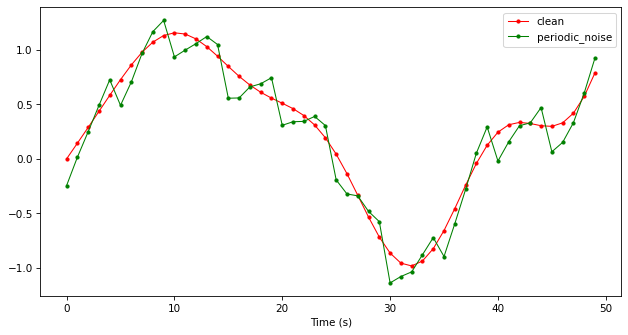

In [2]:
import kineticstoolkit.lab as ktk
import matplotlib.pyplot as plt

ts = ktk.load(ktk.doc.download("filters_types_of_noise.ktk.zip"))
ts.plot(["clean", "periodic_noise"], ".-")

In [10]:
ts

TimeSeries with attributes:
         time: <array of shape (50,)>
         data: <dict with 4 entries>
    time_info: {'Unit': 's'}
    data_info: {}
       events: []

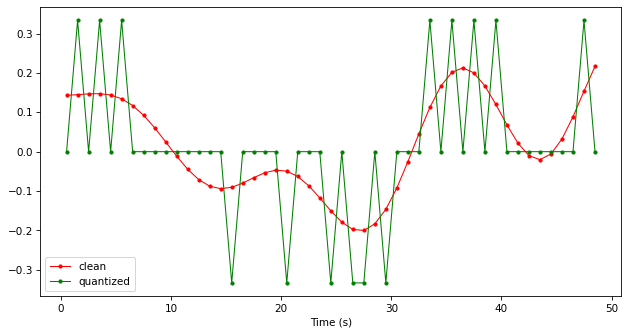

In [14]:
derived = ktk.filters.deriv(ts)
derived.plot(["clean","quantized"], ".-")

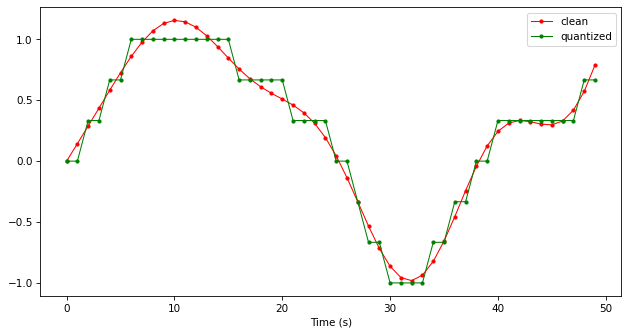

In [23]:
ts.plot(["clean", "quantized"], ".-")

In [24]:
filtered = ktk.filters.savgol(ts, poly_order=2, window_length=7)

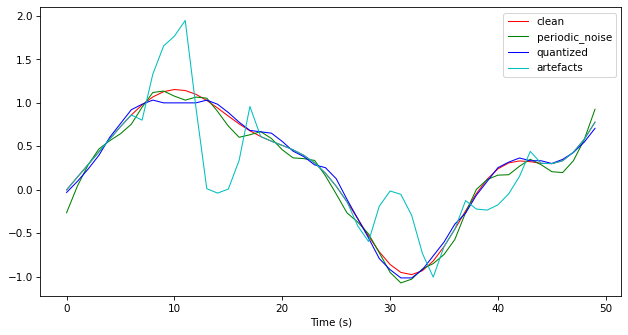

In [27]:
filtered.plot()

## 7.1 The timeSeruies Type

In [58]:
import kineticstoolkit.lab as ktk
import numpy as np
import matplotlib.pyplot as plt

ts = ktk.TimeSeries()
ts.time = np.arange(0,10,0.1)
ts.data["Sinus"] = np.sin(ts.time)
ts.data["Cosinus"] = np.cos(ts.time)
ts.data["SquareRoot"] = np.sqrt(ts.time)

ts

TimeSeries with attributes:
         time: <array of shape (100,)>
         data: <dict with 3 entries>
    time_info: {'Unit': 's'}
    data_info: {}
       events: []

In [63]:
ts.time

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [64]:
ts.data

{
         'Sinus': <array of shape (100,)>
       'Cosinus': <array of shape (100,)>
    'SquareRoot': <array of shape (100,)>
}

In [69]:
ts = ktk.load(ktk.doc.download("kinetics_wheelchair_propulsion.ktk.zip"))
ts.data

{
     'Forces': <array of shape (5000, 4)>
    'Moments': <array of shape (5000, 4)>
}

In [78]:
plt.plot(ts.data["Moments"])

In [65]:
ts.time_info

{
    'Unit': 's'
}

In [66]:
ts.data_info

{
}

In [67]:
plt.subplot(1,3,1)
ts.plot()

plt.subplot(1,3,2)
ts.plot(["Sinus"])

plt.subplot(1,3,3)
ts.plot(["Sinus", "Cosinus"])

plt.tight_layout()

## 7.2.1. Data management

In [29]:
import kineticstoolkit.lab as ktk
markers = ktk.read_c3d(ktk.doc.download("kinematics_tennis_serve.c3d"))["Points"]

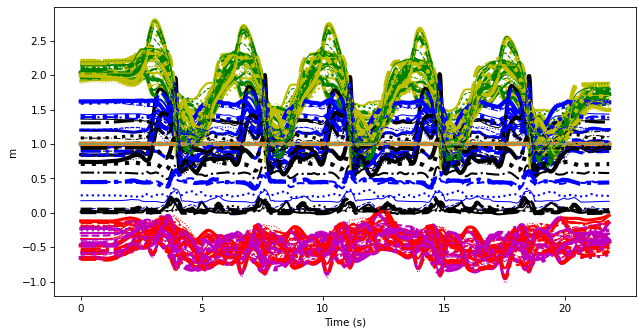

In [30]:
markers.plot(legend=False)

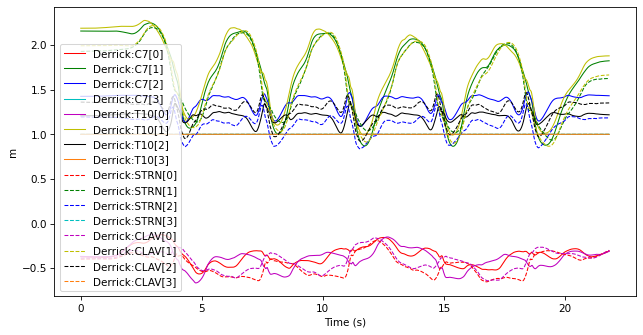

In [32]:
markers_throax = markers.get_subset([
    "Derrick:C7",
    "Derrick:T10",
    "Derrick:STRN",
    "Derrick:CLAV"
])
markers_throax.plot()

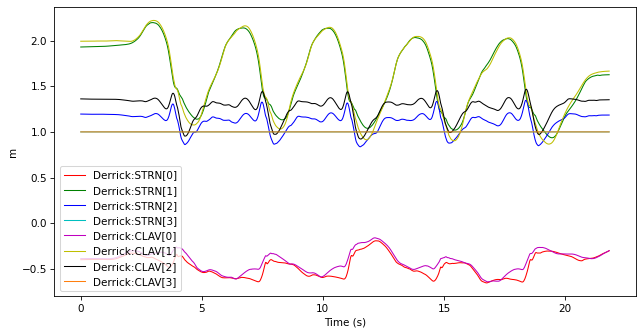

In [34]:
markers_throax =  markers_throax.remove_data("Derrick:C7")
markers_throax = markers_throax.remove_data("Derrick:T10")

markers_throax.plot()

In [37]:
markers_throax.data["Derrick:C7"] = markers.data["Derrick:C7"]
markers_throax.data

{
    'Derrick:STRN': <array of shape (1092, 4)>
    'Derrick:CLAV': <array of shape (1092, 4)>
      'Derrick:C7': <array of shape (1092, 4)>
}

In [38]:
markers_throax = markers_throax.merge(markers.get_subset("Derrick:T10"))
markers_throax.data

{
    'Derrick:STRN': <array of shape (1092, 4)>
    'Derrick:CLAV': <array of shape (1092, 4)>
      'Derrick:C7': <array of shape (1092, 4)>
     'Derrick:T10': <array of shape (1092, 4)>
}

In [39]:
markers_throax = markers_throax.rename_data("Derrick:STRN","Sternum")
markers_throax = markers_throax.rename_data("Derrick:CLAV","Interclavicular")
markers_throax = markers_throax.rename_data("Derrick:C7","C7")
markers_throax = markers_throax.rename_data("Derrick:T10", "T10")

markers_throax.data

{
            'Sternum': <array of shape (1092, 4)>
    'Interclavicular': <array of shape (1092, 4)>
                 'C7': <array of shape (1092, 4)>
                'T10': <array of shape (1092, 4)>
}

## 7.2.2. Time management

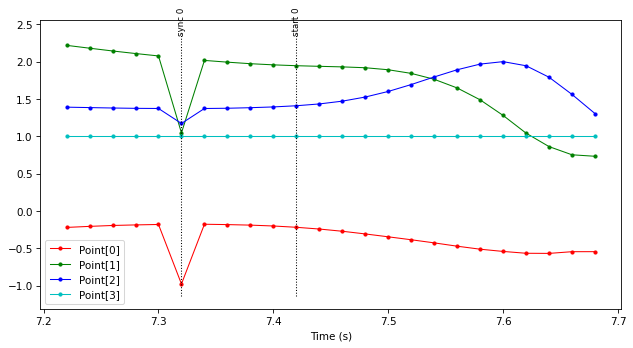

In [47]:
import kineticstoolkit.lab as ktk
import numpy as np
import matplotlib.pyplot as plt

ts = ktk.TimeSeries()
ts.time = np.arange(722, 770, 2) / 100
ts.data["Point"] = np.array([
        [-0.21952191, 2.21998239, 1.3917855, 1.0],
        [-0.20554896, 2.18186331, 1.3860414, 1.0],
        [-0.19351672, 2.14477563, 1.38044441, 1.0],
        [-0.18593165, 2.11034703, 1.37598848, 1.0],
        [-0.17999941, 2.07810235, 1.37413812, 1.0],
        [-0.97747644, 1.04681897, 1.17331319, 1.0],
        [-0.1770632, 2.01822352, 1.37383687, 1.0],
        [-0.18178312, 1.99475348, 1.37715793, 1.0],
        [-0.18880549, 1.97409928, 1.3846097, 1.0],
        [-0.20046318, 1.95866096, 1.39489722, 1.0],
        [-0.21780199, 1.94720566, 1.4106667, 1.0],
        [-0.24116059, 1.93896806, 1.43488669, 1.0],
        [-0.27086243, 1.93140829, 1.47220325, 1.0],
        [-0.30681622, 1.91995525, 1.52735615, 1.0],
        [-0.34540462, 1.89304924, 1.60226464, 1.0],
        [-0.3847855, 1.84441411, 1.69457984, 1.0],
        [-0.42655963, 1.76527178, 1.79648793, 1.0],
        [-0.47107416, 1.64915574, 1.89288461, 1.0],
        [-0.51133025, 1.49018431, 1.96876347, 1.0],
        [-0.54127008, 1.28111708, 2.00170565, 1.0],
        [-0.56586808, 1.04348814, 1.9465847, 1.0],
        [-0.5676325, 0.86329579, 1.79276991, 1.0],
        [-0.5448004, 0.75350696, 1.56222212, 1.0],
        [-0.54447311, 0.73373014, 1.30583119, 1.0],
    ])
ts = ts.add_event(7.32,"sync")
ts = ts.add_event(7.42,"start")

ts.plot([],".-")

In [48]:
ts.get_sample_rate()

50.00000000000001

In [46]:
ts_20Hz = ts.resample(20.0)

ValueError: The following exception was raised: A value (20.0) in x_new is above the interpolation range's maximum value (7.68). .You may want to retry with using fill_value='extrapolate'.

## 7.2.3. Event management

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


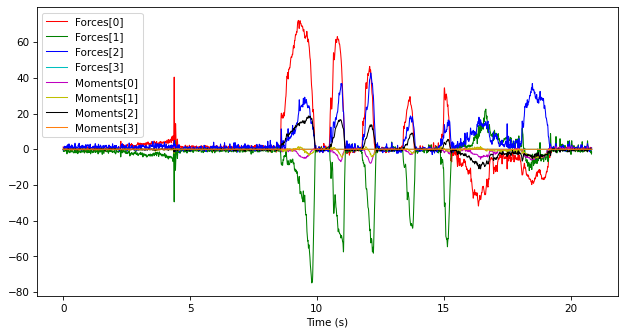

In [1]:
import kineticstoolkit.lab as ktk
import matplotlib.pyplot as plt

ts = ktk.load(ktk.doc.download("kinetics_wheelchair_propulsion.ktk.zip"))
ts.plot()

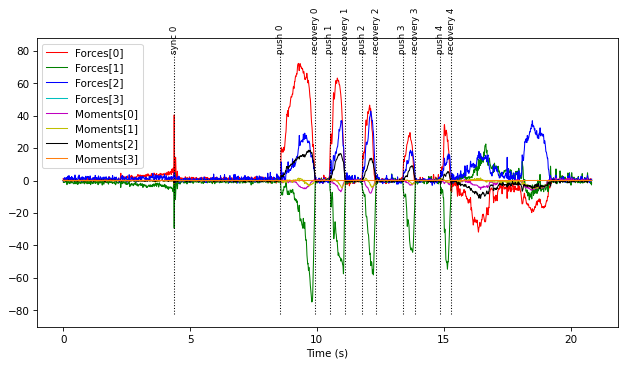

In [2]:
ts = ts.add_event(4.37, "sync")
ts = ts.add_event(8.56, "push")
ts = ts.add_event(9.93,"recovery")
ts = ts.add_event(10.50,"push")
ts = ts.add_event(11.12,"recovery")
ts = ts.add_event(11.78,"push")
ts = ts.add_event(12.33,"recovery")
ts = ts.add_event(13.39,"push")
ts = ts.add_event(13.88,"recovery")
ts = ts.add_event(14.86,"push")
ts = ts.add_event(15.30, "recovery")

ts.plot()

In [3]:
print(ts.count_events("sync"),"occurences of event 'sync'")
print(ts.count_events("push"),"occurences of event 'push'")
print(ts.count_events("recovery"), "occurences of event 'recovery'")

1 occurences of event 'sync'
5 occurences of event 'push'
5 occurences of event 'recovery'


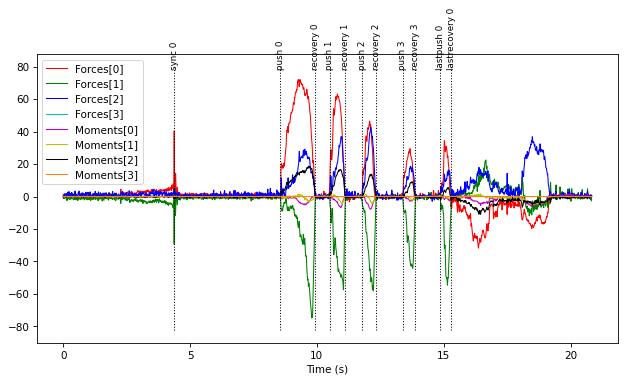

In [4]:
ts = ts.rename_event("push", "lastpush", occurrence=4)
ts = ts.rename_event("recovery", "lastrecovery", occurrence=4)

ts.plot()

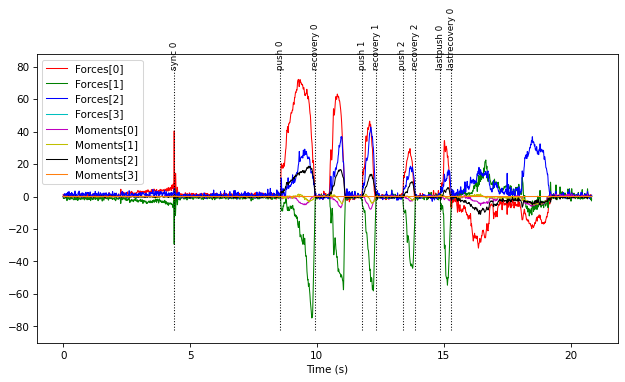

In [5]:
ts = ts.remove_event("push", occurrence=1)
ts = ts.remove_event("recovery", occurrence=1)

ts.plot()

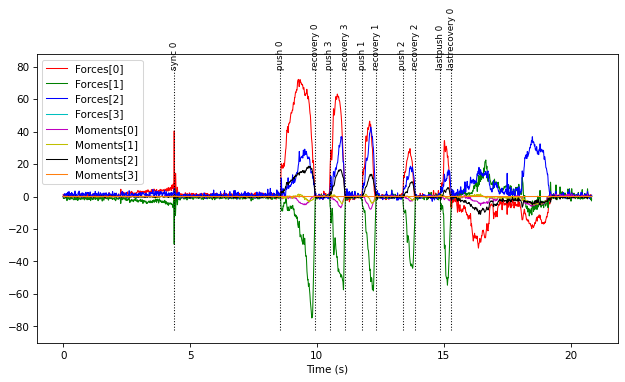

In [6]:
ts =  ts.add_event(10.50, "push")
ts =  ts.add_event(11.12, "recovery")

ts.plot()

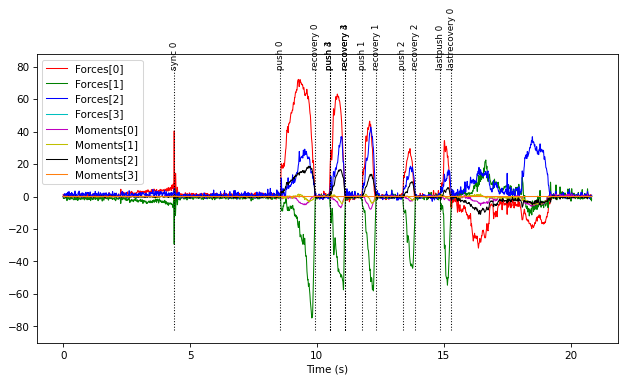

In [7]:
ts = ts.add_event(10.50, "push")
ts = ts.add_event(11.12, "recovery")

ts.plot()

In [8]:
ts.events

[TimeSeriesEvent(time=4.37, name='sync'),
 TimeSeriesEvent(time=8.56, name='push'),
 TimeSeriesEvent(time=9.93, name='recovery'),
 TimeSeriesEvent(time=11.78, name='push'),
 TimeSeriesEvent(time=12.33, name='recovery'),
 TimeSeriesEvent(time=13.39, name='push'),
 TimeSeriesEvent(time=13.88, name='recovery'),
 TimeSeriesEvent(time=14.86, name='lastpush'),
 TimeSeriesEvent(time=15.3, name='lastrecovery'),
 TimeSeriesEvent(time=10.5, name='push'),
 TimeSeriesEvent(time=11.12, name='recovery'),
 TimeSeriesEvent(time=10.5, name='push'),
 TimeSeriesEvent(time=11.12, name='recovery')]

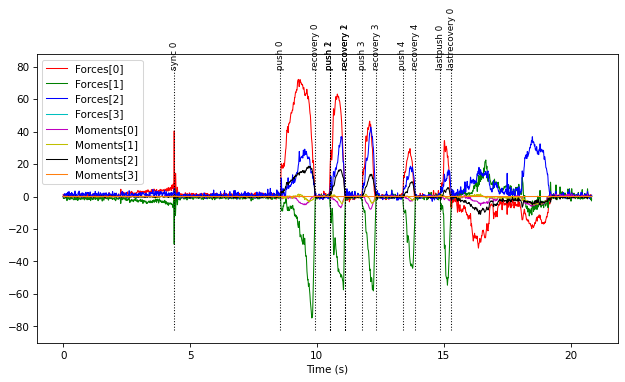

In [9]:
ts = ts.sort_events()

ts.plot()

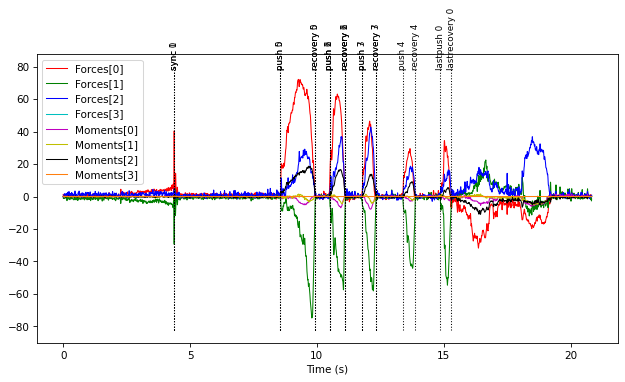

In [10]:
ts = ts.add_event(4.37, "sync")
ts = ts.add_event(8.56, "push")
ts = ts.add_event(9.93, "recovery")
ts = ts.add_event(10.50, "push")
ts = ts.add_event(11.12, "recovery")
ts = ts.add_event(11.78, "push")
ts = ts.add_event(12.33, "recovery")

ts.plot()

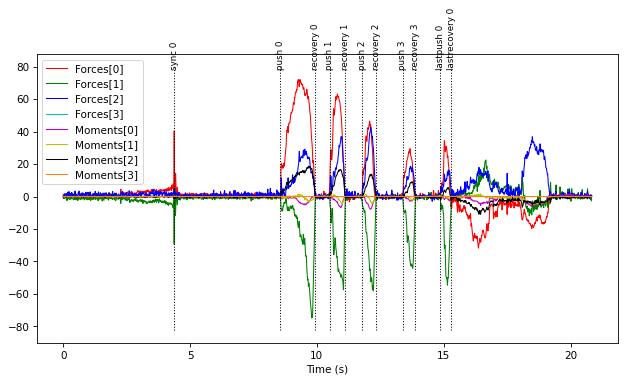

In [12]:
ts = ts.remove_duplicate_events()
ts.plot()

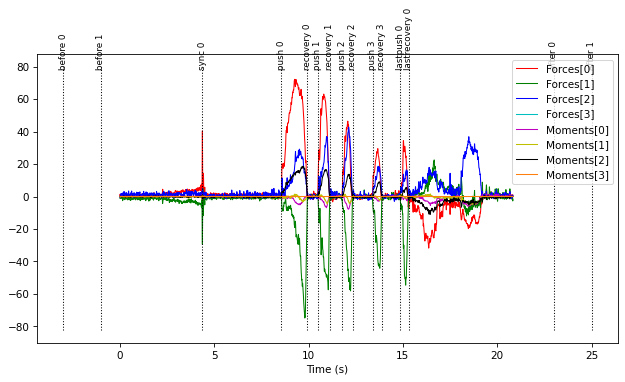

In [13]:
ts = ts.add_event(-3.0, "before")
ts = ts.add_event(-1.0, "before")
ts = ts.add_event(23.0, "after")
ts = ts.add_event(25.0, "after")

ts.plot()

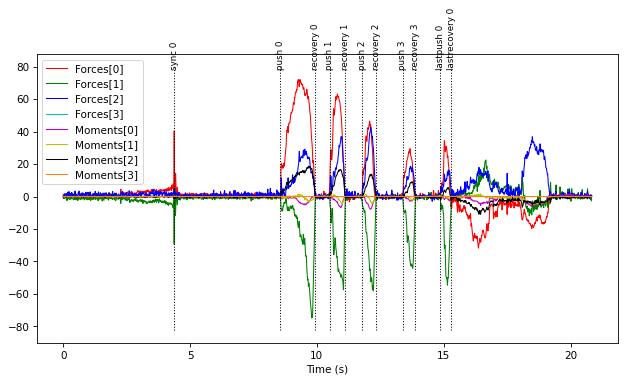

In [14]:
ts = ts.trim_events()
ts.plot()

In [15]:
%matplotlib qt5

In [16]:
ts = ts.ui_edit_events()

### 特征时刻处理总结
特征时刻处理有增、删、查、改，增包含填补空缺值，删里面包含删除和剪除，查包含查找和排序。

## 7.2.4. Indexing TimeSeries

In [17]:
import kineticstoolkit.lab as ktk
import matplotlib.pyplot as plt

ts = ktk.load(ktk.doc.download("kinetics_wheelchair_propulsion_events.ktk.zip"))
ts.plot()

In [18]:
print("Time is", ts.time[99])
print("Force is", ts.data["Forces"][99])

Time is 0.4125
Force is [ 0.27 -1.93  0.41  0.  ]


In [19]:
print("The index that is nearest to 15 seconds is:")
print(ts.get_index_at_time(15.0))

print("The index that is just before 15 seconds is:")
print(ts.get_index_before_time(15.0))

print("The index that is just after 15 seconds is:")
print(ts.get_index_after_time(15.0))

The index that is nearest to 15 seconds is:
3600
The index that is just before 15 seconds is:
3599
The index that is just after 15 seconds is:
3601


In [20]:
print("The index that is nearest to 2nd push is:")
print(ts.get_index_at_event("push", occurrence=1))

print("The index that is just before 2nd push is:")
print(ts.get_index_before_event("push", occurrence=1))

print("The index that is just after 2nd push is:")
print(ts.get_index_after_event("push", occurrence=1))

The index that is nearest to 2nd push is:
2520
The index that is just before 2nd push is:
2519
The index that is just after 2nd push is:
2521


In [22]:
import kineticstoolkit.lab as ktk
import matplotlib.pyplot as plt

ts = ktk.load(ktk.doc.download("kinetics_wheelchair_propulsion_events.ktk.zip"))
ts.plot()

In [25]:
print("push events is:")
print(ts.count_events("push"))

print("recovery events is:")
print(ts.count_events("recovery"))

push events is:
5
recovery events is:
5


In [33]:
# 构建函数
def get_event_times(event_name):
    event_times = []
    for i in range(ts.count_events(event_name)):
        index = ts.get_index_at_event(event_name, occurrence=i)
        event_times.append(ts.time[index])
    return event_times

# 调用函数
push_times = get_event_times("push")
recovery_times = get_event_times("recovery")

# 打印结果
print("push times is:", push_times)
print("recovery_times is:", recovery_times)

### 总结笔记
生物力学的时间序列包含数据、特征时刻，数据又包含时间以及索引两方面，时间序列要能够灵活的在时间、索引以及特征时刻之间进行转换。

## 7.2.5 Segmenting TimeSeries

In [36]:
import kineticstoolkit.lab as ktk 
ts = ktk.load(ktk.doc.download("kinetics_wheelchair_propulsion_events.ktk.zip"))
ts.plot()

In [37]:
new_ts = ts.get_ts_after_index(1049)
new_ts.plot()

In [38]:
new_ts = ts.get_ts_after_time(4.37)

In [39]:
new_ts = ts.get_ts_after_event("sync")

In [41]:
# Extract the four pushes
first_four_pushes = ts.get_ts_between_events(
    "push", "push", 0, 4, inclusive=True
)

# Remove the events outside the resulting TimeSeries
first_four_pushes = first_four_pushes.trim_events()

# plot the result
first_four_pushes.plot()

In [94]:
# 7.2.5.4. Exercise: Segmenting TimeSeries
import kineticstoolkit.lab as ktk
ts = ktk.load(ktk.doc.download("kinetics_wheelchair_propulsion_events.ktk.zip"))

In [95]:
# Extract the three pushes
first_1_pushes = ts.get_ts_between_events(
    "push", "push", 0, 1, inclusive=True
)

# Remove the events outside the resulting TimeSeries
first_1_pushes =  first_1_pushes.trim_events()

first_1_pushes_peak_Mz = first_1_pushes.data["Moments"].max()

In [104]:
plt.close()
plt.plot(ts.data["Moments"][:,2])


In [102]:
# 定义函数
def get_Peak_Moments(ts, counts):
    import numpy as np
    peak_Mzs = []
    for i in range(counts):
        # Extract the three pushes
        first_i = ts.get_ts_between_events(
            "push", "push", i, i+1, inclusive=True
        )

        # Remove the events outside the resulting TimeSeries
        first_i = first_i.trim_events()
        first_i_peak_Mz = first_i.data["Moments"].max()
        peak_Mzs.append(first_i_peak_Mz)
    return peak_Mzs 

# 调用函数
peak_Mzs = get_Peak_Moments(ts,3)
print("peak_Mzs is:", peak_Mzs)

peak_Mzs is: [18.65, 16.58, 13.7]


## 7.2.6 Missing data

In [106]:
import kineticstoolkit.lab as ktk
import numpy as np

filename = ktk.doc.download("kinematics_tennis_serve_nan.c3d")
markers = ktk.read_c3d(filename)["Points"]
markers.plot("Derrick:RSHO")

In [107]:
is_missing = markers.isnan("Derrick:RSHO")
np.nonzero(is_missing)

(array([134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 192, 193, 194, 195, 331, 332, 333, 334, 335, 336, 337, 338,
        373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385,
        498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510,
        511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 549, 550, 551,
        552, 553, 554, 555, 660, 661, 662, 663, 664, 665, 666, 667, 668,
        669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681,
        682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694,
        695, 696, 697, 698, 699, 700, 701, 735, 736, 737, 738, 739, 740,
        741, 742, 743, 744, 745, 746, 862, 863, 864, 865, 866, 867, 868,
        869, 870, 871, 872, 917, 918, 919, 920, 921, 922, 923, 924, 925,
        926, 927]),)

In [111]:
plt.close()

In [110]:
filled_markers = markers.fill_missing_samples(
    max_missing_samples=20
)

filled_markers.plot("Derrick:RSHO")

In [112]:
filled_markers = markers.fill_missing_samples(
    max_missing_samples=20,
    method="cubic"
)
filled_markers.plot("Derrick:RSHO")

In [114]:
ts2 = ts.copy(copy_data=False, copy_data_info=False)

In [115]:
ts2

TimeSeries with attributes:
         time: <array of shape (5000,)>
         data: {}
    time_info: {'Unit': 's'}
    data_info: {}
       events: <list of 11 items>